# Learning Models with Simulations
Vincent Wilmet
Lecture 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Estimating Pi

In [32]:
N = 1000
X = 2*np.random.rand(N, 1) - 1
Y = 2*np.random.rand(N, 1) - 1
X[:4]

array([[-0.33197275],
       [ 0.21609717],
       [-0.28046557],
       [ 0.43659111]])

In [33]:
in_circle_x , in_circle_y = [], []
not_in_circle_x , not_in_circle_y = [], []


def myfunc(X, Y): 
  val = X**2 + Y**2
  if val < 1:
    in_circle_x.append(X)
    in_circle_y.append(Y)
  else: 
    not_in_circle_x.append(X)
    not_in_circle_y.append(Y)

vfunc = np.vectorize(myfunc, otypes=[float])

In [34]:
out = vfunc(X, Y)
print(len(in_circle_x))

784


In [35]:
proportion = len(in_circle_x)/N 
pi = 4*proportion
print("pi: ", pi)

pi:  3.136


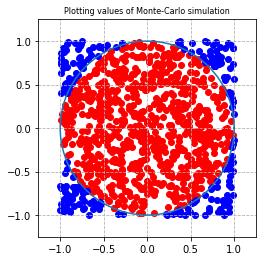

In [36]:
theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

plt.title('Plotting values of Monte-Carlo simulation', fontsize=8)

# plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')
plt.scatter(in_circle_x, in_circle_y, c="red") 
plt.scatter(not_in_circle_x, not_in_circle_y, c="blue")
plt.show()

# Part 2:

In [37]:
N = 10000000
X = 2*np.random.rand(N, 1) - 1
Y = 2*np.random.rand(N, 1) - 1
X[:4]

array([[ 0.30563089],
       [-0.84087926],
       [ 0.2103575 ],
       [ 0.26812658]])

In [38]:
in_circle_x , in_circle_y = [], []
not_in_circle_x , not_in_circle_y = [], []

def myfunc(X, Y): 
  val = X**2 + Y**2
  if val < 1:
    in_circle_x.append(X)
    in_circle_y.append(Y)
  else: 
    not_in_circle_x.append(X)
    not_in_circle_y.append(Y)

vfunc = np.vectorize(myfunc, otypes=[float])

In [39]:
out = vfunc(X, Y)
print(len(in_circle_x))

7854096


In [40]:
proportion = len(in_circle_x)/N 
pi = 4*proportion
print("pi: ", pi)

pi:  3.1416384


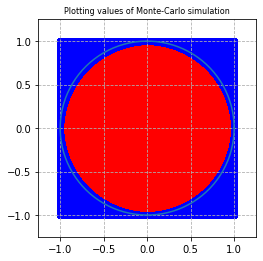

In [41]:
theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

plt.title('Plotting values of Monte-Carlo simulation', fontsize=8)

# plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')
plt.scatter(in_circle_x, in_circle_y, c="red") 
plt.scatter(not_in_circle_x, not_in_circle_y, c="blue")
plt.show()

# Exercise 2:


In [42]:
N = 100000
lmda = 2
U = np.random.rand(N, 1) 

In [43]:
def myfunc(u): 
  return (-1/lmda)*np.log(1-u)
vfunc = np.vectorize(myfunc, otypes=[float])
out = vfunc(U)

<function matplotlib.pyplot.show>

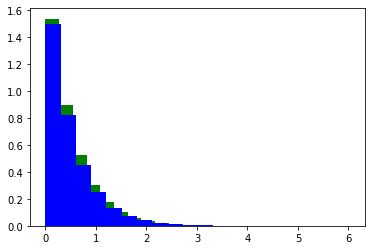

In [65]:
# Using exponential() method
gfg = np.random.exponential((1/lmda), N)
  
count, bins, ignored = plt.hist(gfg, bins = 20, density = True, color="green")
plt.hist(out, bins = 20, density = True, color="blue")
plt.show

# Categorical

In [70]:
def inverseCDF(pmf, N):
    """Simulate N samples from categorical distribution"""
    samples = np.zeros(N)
    cdf = np.cumsum(pmf)
    for n in range(N):
        # sample uniform
        U = np.random.rand(1)
        k = 0 
        while (cdf[k] < U):
            k = k + 1
        samples[n] = k
    return samples

In [71]:
# number of categories
K = 5

# creating a probability mass function
pmf = np.random.rand(K)
pmf = pmf / np.sum(pmf)

# sample size
N = 10000

# sample using inverse CDF method
X = inverseCDF(pmf, N)

In [72]:
# sample proportions of taking integers 
sample_proportion = np.unique(X, return_counts = True)[1] / N
sample_proportion

array([0.1302, 0.2398, 0.1965, 0.014 , 0.4195])

In [73]:
# compare with theoretical probabilities
pmf

array([0.12946084, 0.24463996, 0.195574  , 0.01306241, 0.41726278])